# Alucar - Analisando as vendas

In [101]:
import pandas as pd

In [102]:
alucar = pd.read_csv('dados/alucar.csv')

In [103]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [104]:
print(f'Quantidade de linhas e colunas {alucar.shape}')

Quantidade de linhas e colunas (24, 2)


In [105]:
print(f'Quantidade de dados nulos {alucar.isna().sum().sum()}')

Quantidade de dados nulos 0


In [106]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [107]:
alucar['mes'] = pd.to_datetime(alucar.mes)

In [108]:
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [109]:
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

In [110]:
sns.__version__

'0.10.1'

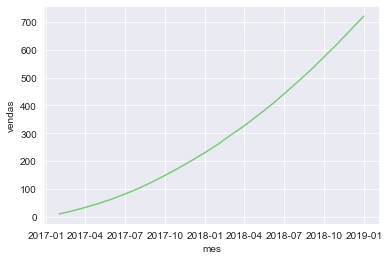

In [111]:
sns.lineplot(x='mes', y='vendas', data=alucar)

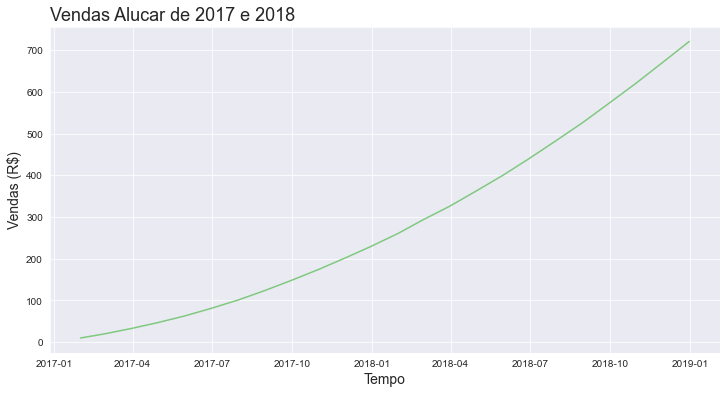

In [112]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax.figure.set_size_inches(12, 6)
ax.set_title('Vendas Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas (R$)', fontsize=14)
ax = ax

In [113]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [114]:
alucar['aumento'] = alucar['vendas'].diff()

In [115]:
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


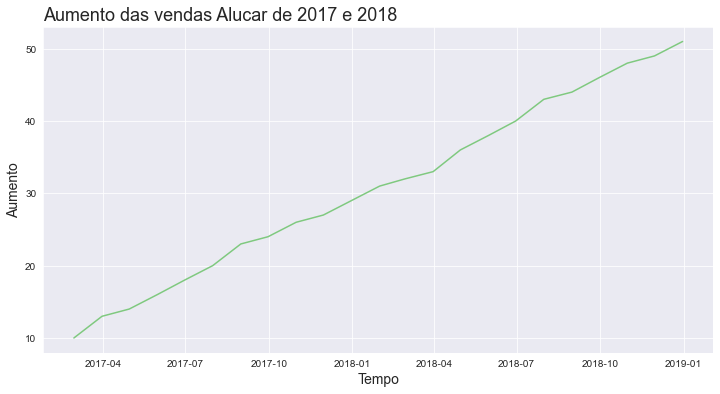

In [116]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='aumento', data=alucar)
ax.figure.set_size_inches(12, 6)
ax.set_title('Aumento das vendas Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Aumento', fontsize=14)
ax = ax

In [175]:
def plotar(titulo, labex, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(12, 6)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(labex, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)
    ax = ax

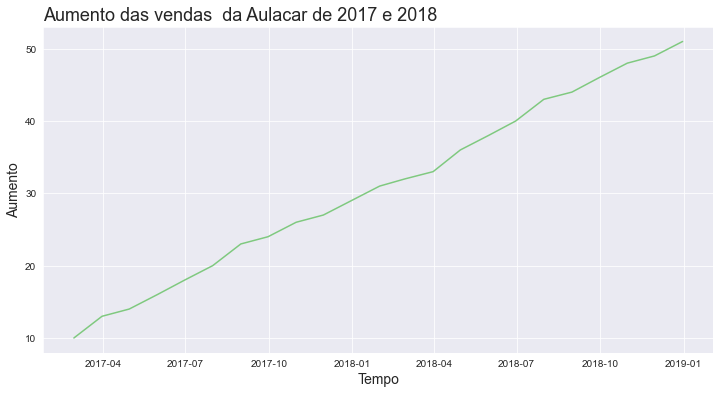

In [118]:
plotar('Aumento das vendas  da Aulacar de 2017 e 2018', 'Tempo', 'Aumento', 'mes', 'aumento', alucar)

In [119]:
alucar['aceleracao'] = alucar.aumento.diff()

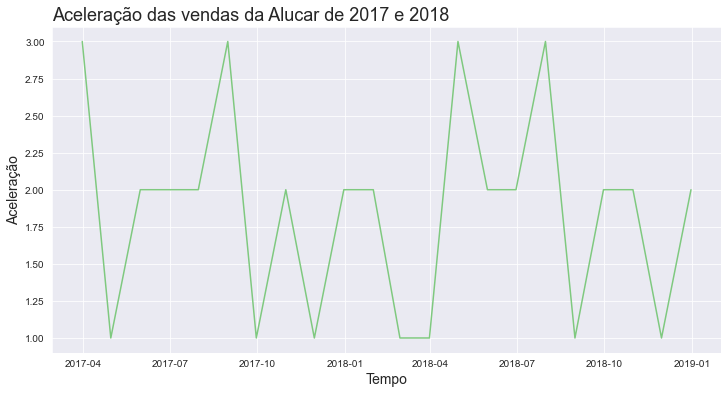

In [120]:
plotar('Aceleração das vendas da Alucar de 2017 e 2018', 'Tempo', 'Aceleração', 'mes', 'aceleracao', alucar)

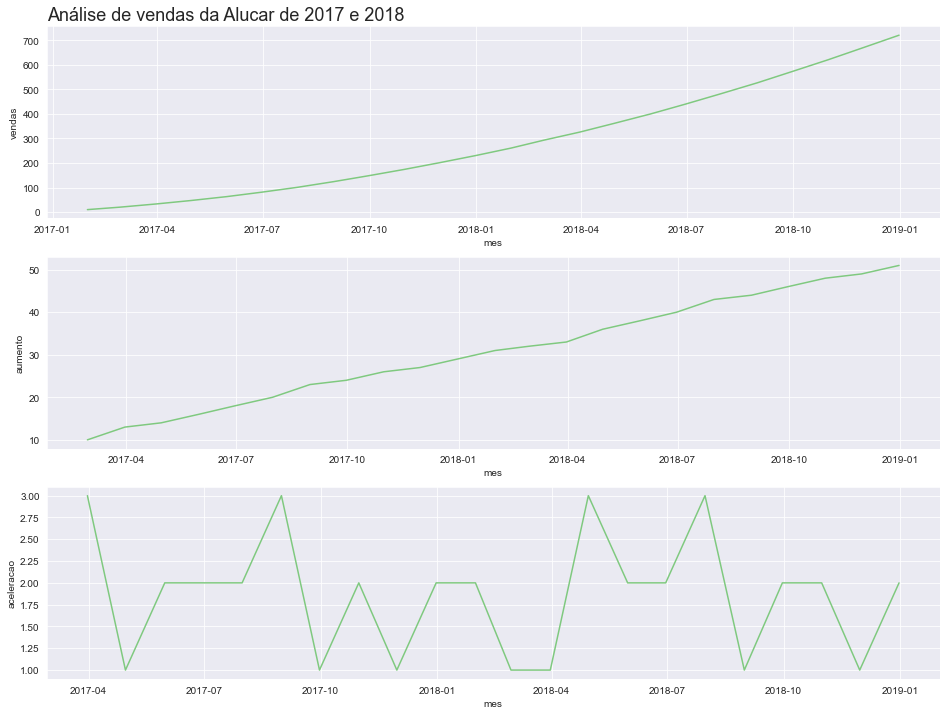

In [121]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3, 1, 1)
ax.set_title('Análise de vendas da Alucar de 2017 e 2018', fontsize=18, loc='left')
sns.lineplot(x='mes', y='vendas', data=alucar)
plt.subplot(3, 1, 2)
sns.lineplot(x='mes', y='aumento', data=alucar)
plt.subplot(3, 1, 3)
sns.lineplot(x='mes', y='aceleracao', data=alucar)
ax = ax

In [122]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3, 1, 1)
    ax.set_title(titulo, fontsize=18, loc='left')
    sns.lineplot(x=x, y=y1, data=dataset)
    plt.subplot(3, 1, 2)
    sns.lineplot(x=x, y=y2, data=dataset)
    plt.subplot(3, 1, 3)
    sns.lineplot(x=x, y=y3, data=dataset)
    ax = ax

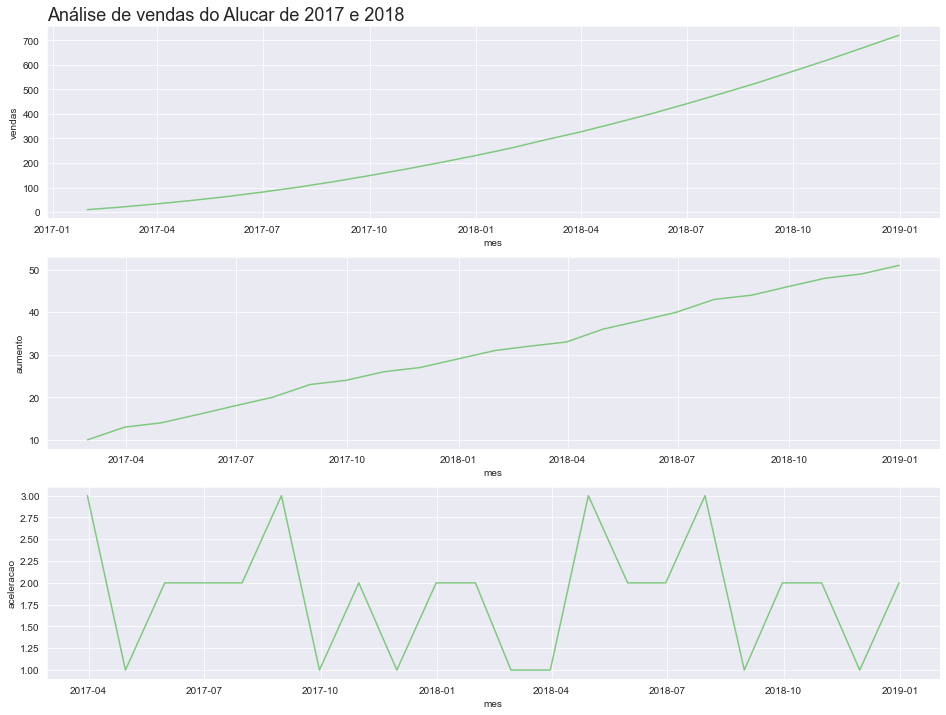

In [123]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', alucar, 'Análise de vendas do Alucar de 2017 e 2018')

In [124]:
from pandas.plotting import autocorrelation_plot

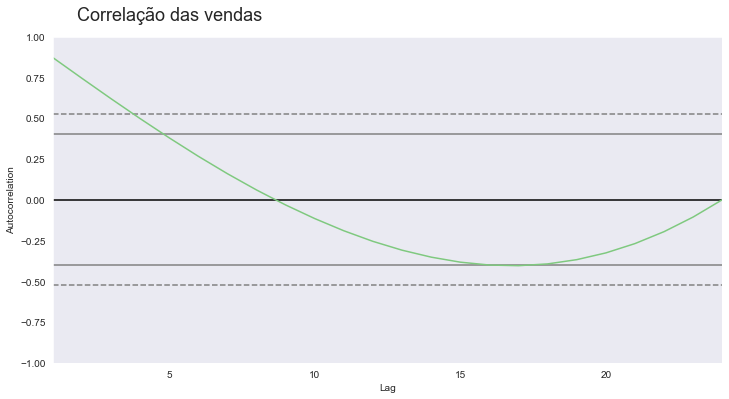

In [125]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação das vendas', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar.vendas)
ax = ax

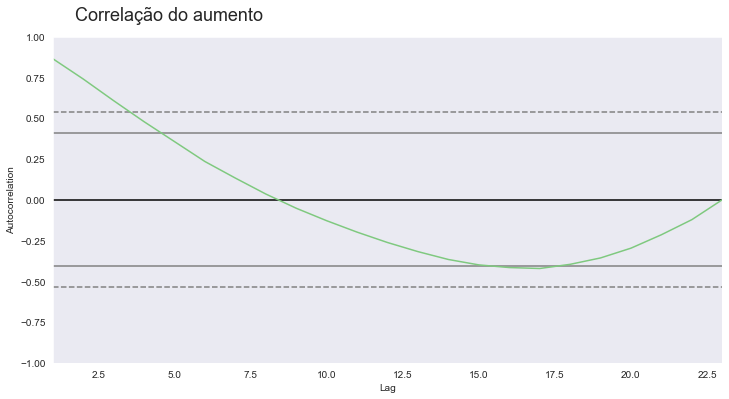

In [126]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação do aumento', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar.aumento[1:])
ax = ax

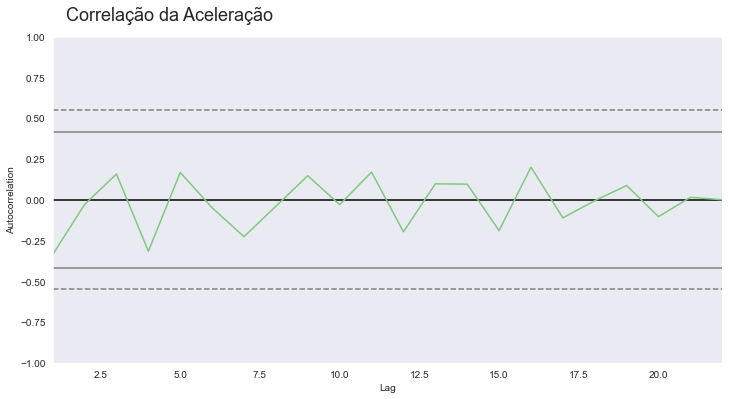

In [127]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação da Aceleração', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar.aceleracao[2:])
ax = ax

 # Alucar - Análise assinantes da newslatter

In [128]:
assinantes = pd.read_csv('dados/newsletter_alucar.csv')

In [129]:
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [130]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [131]:
print('Quantidade de linhas e colunas: ', assinantes.shape)
print('Quantidade de dados nulos: ', assinantes.isna().sum().sum())

Quantidade de linhas e colunas:  (24, 2)
Quantidade de dados nulos:  0


In [132]:
assinantes.mes = pd.to_datetime(assinantes.mes)

In [133]:
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [134]:
assinantes['aumento'] = assinantes.assinantes.diff()
assinantes['aceleracao'] = assinantes.aumento.diff()

In [135]:
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


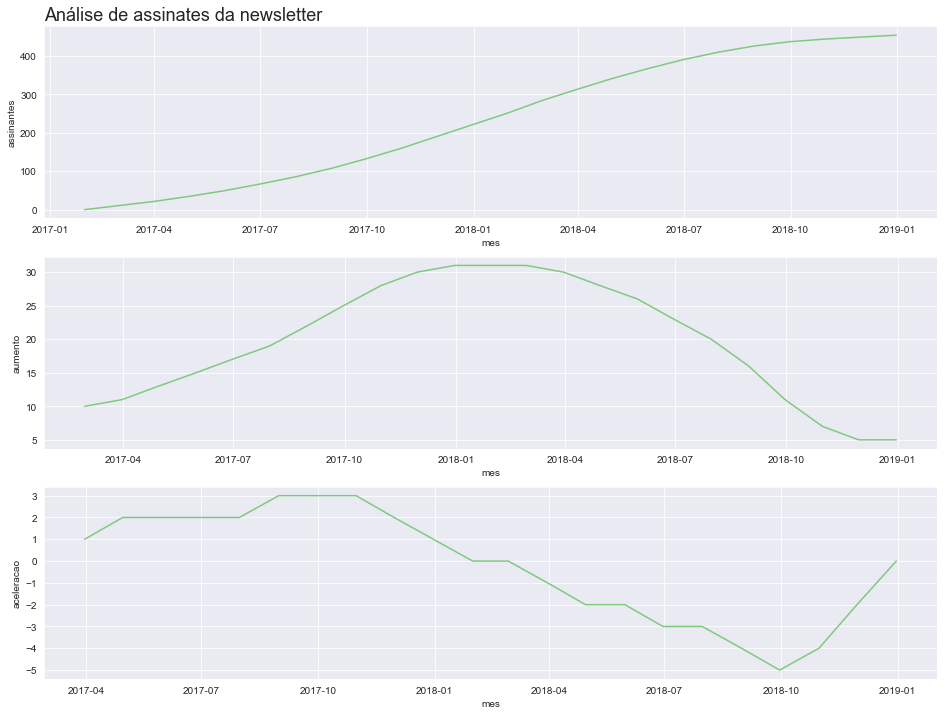

In [136]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao', assinantes, 'Análise de assinates da newsletter')

# Chocolura - Analisando as vendas

In [137]:
chocolura = pd.read_csv('dados/chocolura.csv')

In [138]:
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [139]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [140]:
chocolura.mes = pd.to_datetime(chocolura.mes)

In [141]:
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [142]:
print('Quantidade de linhas: ', chocolura.shape)
print('Quantidade de dados lunos: ', chocolura.isna().sum().sum())

Quantidade de linhas:  (24, 2)
Quantidade de dados lunos:  0


In [143]:
chocolura['aumento'] = chocolura.vendas.diff()
chocolura['aceleracao'] = chocolura.aumento.diff()

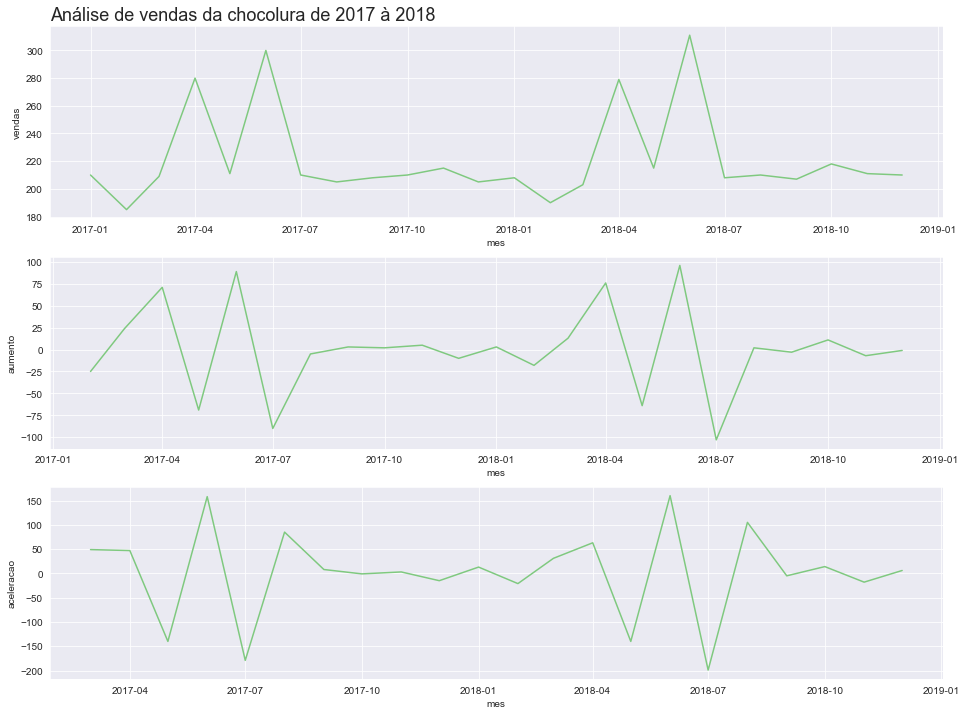

In [144]:
plot_comparacao('mes','vendas','aumento','aceleracao', chocolura, 'Análise de vendas da chocolura de 2017 à 2018')

# Chocolura - Vendas diárias (Outubro e Novembro)

In [145]:
vendas_por_dia = pd.read_csv('dados/vendas_por_dia.csv')

In [146]:
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [147]:
print('Quantidade de linhas: ', vendas_por_dia.shape)
print('Quantidade de dados lunos: ', vendas_por_dia.isna().sum().sum())

Quantidade de linhas:  (61, 2)
Quantidade de dados lunos:  0


In [148]:
vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

In [149]:
vendas_por_dia.dia = pd.to_datetime(vendas_por_dia.dia)

In [150]:
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [151]:
vendas_por_dia['aumento'] = vendas_por_dia.vendas.diff()
vendas_por_dia['aceleracao'] = vendas_por_dia.aumento.diff()

In [152]:
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


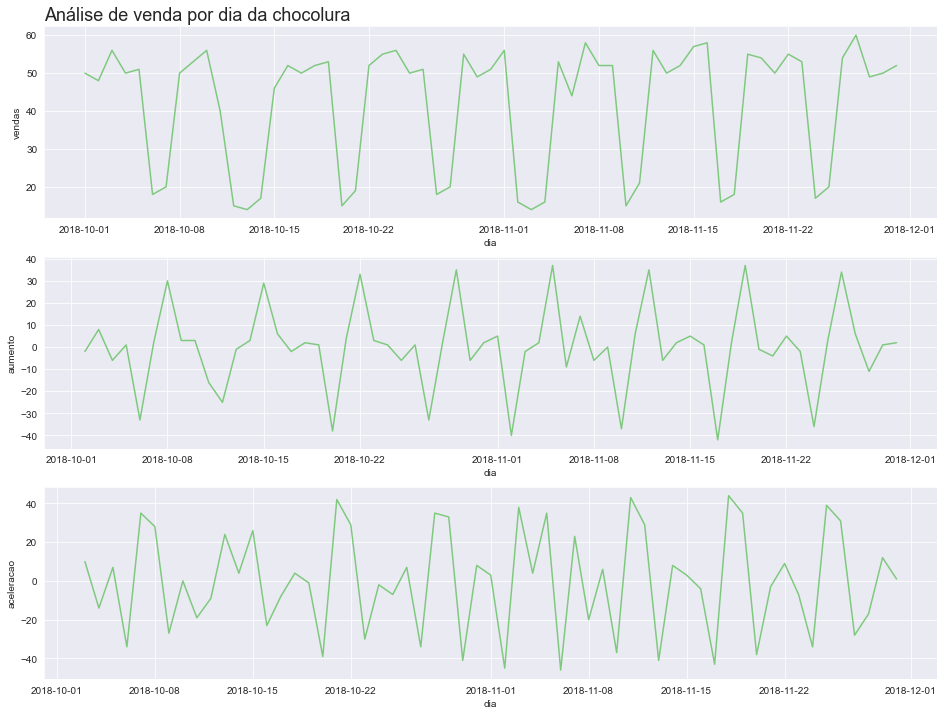

In [153]:
plot_comparacao('dia','vendas','aumento','aceleracao',vendas_por_dia,'Análise de venda por dia da chocolura')

 **Analisando a sazonalidade**

In [154]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.day_name()

In [155]:
vendas_por_dia.head(7)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday
5,2018-10-06,18,-33.0,-34.0,Saturday
6,2018-10-07,20,2.0,35.0,Sunday


In [156]:
vendas_por_dia['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [157]:
dias_traduzidos = {'Monday' : 'Segunda', 'Tuesday' : 'Terca', 'Wednesday' : 'Quarta',
                   'Thursday' : 'Quinta', 'Friday' : 'Sexta', 'Saturday' : 'Sabado',
       'Sunday' : 'Domingo'}

In [158]:
vendas_por_dia.dia_da_semana = vendas_por_dia.dia_da_semana.map(dias_traduzidos)

In [159]:
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terca
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta


In [160]:
vendas_por_dia.head(14)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terca
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
5,2018-10-06,18,-33.0,-34.0,Sabado
6,2018-10-07,20,2.0,35.0,Domingo
7,2018-10-08,50,30.0,28.0,Segunda
8,2018-10-09,53,3.0,-27.0,Terca
9,2018-10-10,56,3.0,0.0,Quarta


**Agrupando os dias**

In [161]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')[['vendas','aumento','aceleracao']].mean().round()

In [162]:
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Sabado,16.0,-28.0,-20.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Terca,52.0,-1.0,-34.0


**Corelação das vendas diárias**

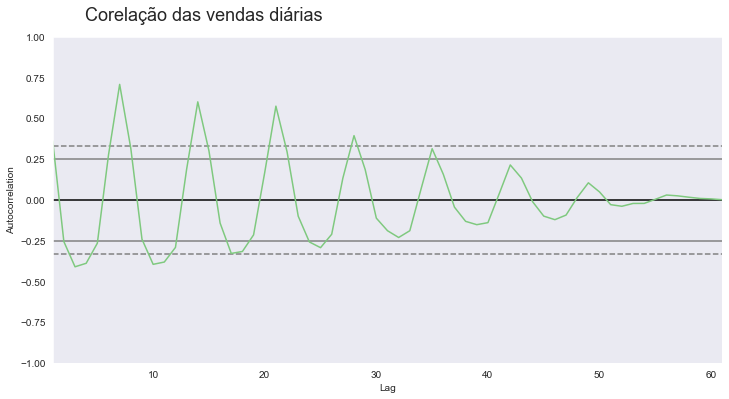

In [163]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Corelação das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax = ax

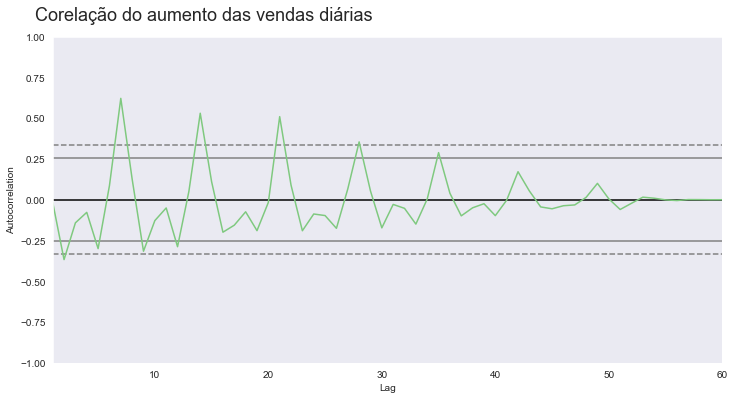

In [164]:
 ax = plt.figure(figsize=(12,6))
ax.suptitle('Corelação do aumento das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax = ax

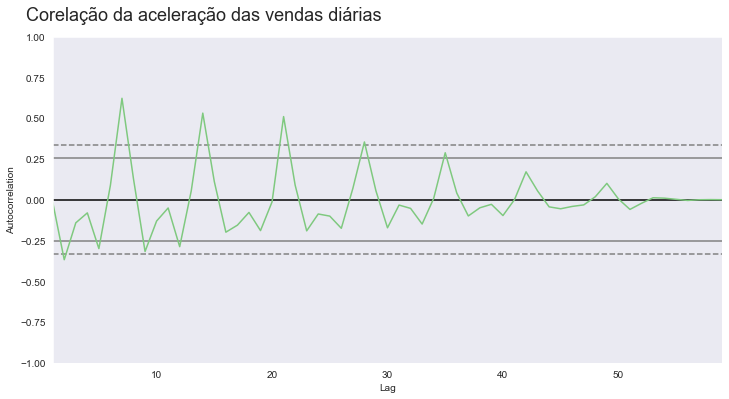

In [165]:
 ax = plt.figure(figsize=(12,6))
ax.suptitle('Corelação da aceleração das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['aumento'][2:])
ax = ax

# Cafelura - Análise de vendas

In [166]:
cafelura = pd.read_csv('dados/cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [167]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [168]:
cafelura.mes = pd.to_datetime(cafelura.mes)
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [169]:
print('Quantidade de linhas e colunas; ', cafelura.shape)
print('Quantidade de dados nulos: ', cafelura.isna().sum().sum())

Quantidade de linhas e colunas;  (24, 2)
Quantidade de dados nulos:  0


In [171]:
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


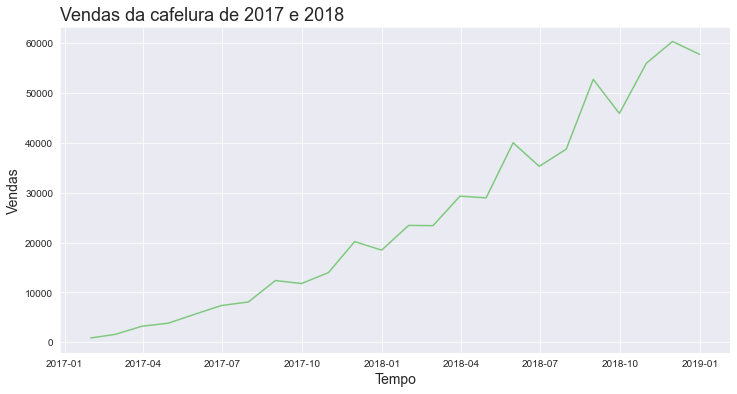

In [176]:
plotar('Vendas da cafelura de 2017 e 2018', 'Tempo', 'Vendas', 'mes', 'vendas', cafelura)

In [177]:
quantidade_de_dias_fds = pd.read_csv('dados/dias_final_de_semana.csv')
quantidade_de_dias_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [179]:
quantidade_de_dias_fds.quantidade_de_dias.values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8], dtype=int64)

In [180]:
cafelura['vendas_normalizadas'] = cafelura.vendas / quantidade_de_dias_fds.quantidade_de_dias.values

In [181]:
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


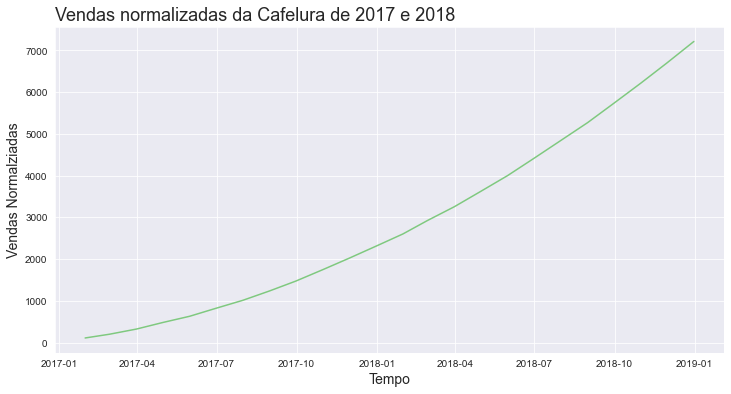

In [182]:
plotar('Vendas normalizadas da Cafelura de 2017 e 2018', 'Tempo', 'Vendas Normalziadas', 'mes', 'vendas_normalizadas', cafelura)

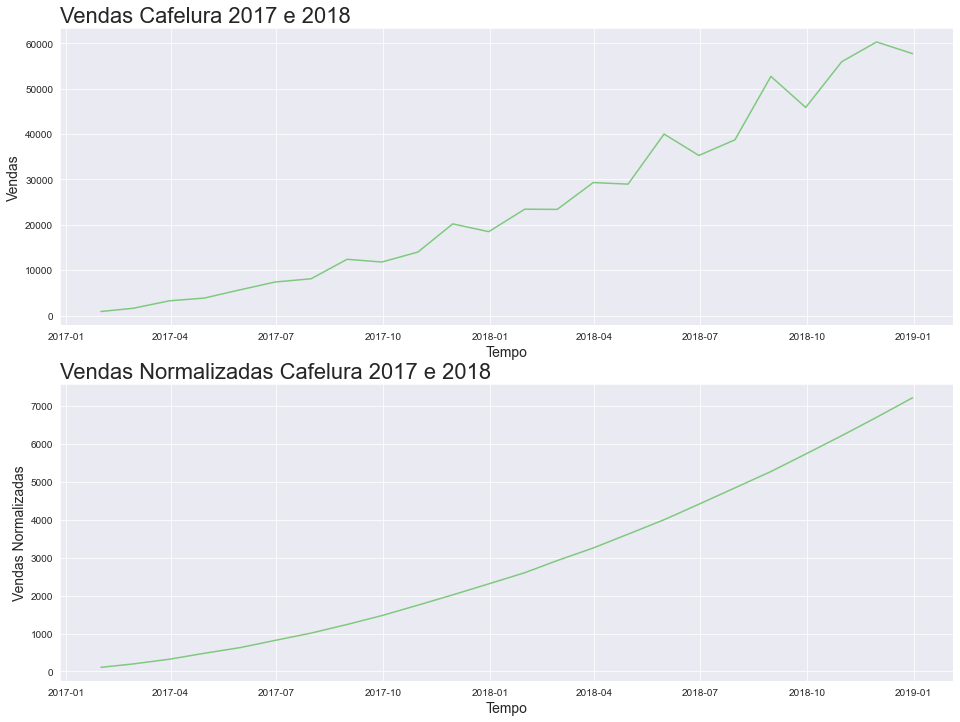

In [196]:
plt.figure(figsize = (16,12))
ax = plt.subplot(2,1,1)
ax.set_title('Vendas Cafelura 2017 e 2018', fontsize = 22, loc='left')
sns.lineplot(x='mes', y='vendas', data=cafelura)
ax.set_ylabel('Vendas', fontsize = 14)
ax.set_xlabel('Tempo', fontsize = 14)
ax = plt.subplot(2,1,2)
ax.set_title('Vendas Normalizadas Cafelura 2017 e 2018', fontsize = 22, loc='left')
sns.lineplot(x='mes', y='vendas_normalizadas', data=cafelura)
ax.set_ylabel('Vendas Normalizadas', fontsize = 14)
ax.set_xlabel('Tempo', fontsize = 14)
ax = ax

# Statsmodels

In [197]:
from statsmodels.tsa.seasonal import seasonal_decompose

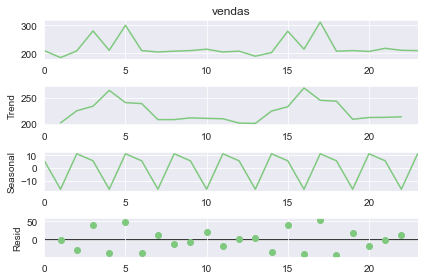

In [215]:
resultados = seasonal_decompose(chocolura['vendas'], period=3)
ax = resultados.plot()

In [217]:
observacao = resultados.observed
tendencia = resultados.trend
sazonalidade = resultados.seasonal
ruido = resultados.resid

In [218]:
data = ({
    'observacao' : observacao,
    'tendencia' : tendencia,
    'sazonalidade' : sazonalidade,
    'ruido' : ruido,
})
resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210.0,NaN,5.603175,NaN
1,185.0,201.333333,-16.730159,0.396825
2,209.0,224.666667,11.126984,-26.793651
3,280.0,233.333333,5.603175,41.063492
4,211.0,263.666667,-16.730159,-35.936508


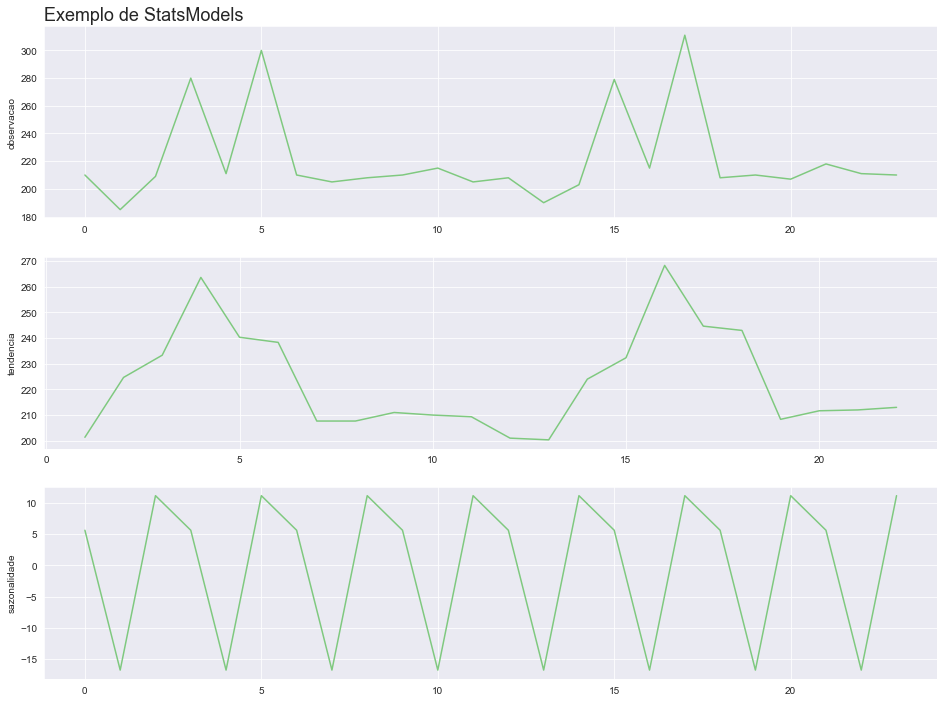

In [227]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'sazonalidade', resultado, 'Exemplo de StatsModels')

# Alucel - Análise de vendas

In [228]:
alucel = pd.read_csv('dados/alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [229]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [230]:
alucel.dia = pd.to_datetime(alucel.dia)

In [231]:
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [232]:
print('Quantidade de linhas e colunas', alucel.shape)
print('Quantidade de dados nulos', alucel.isna().sum().sum())

Quantidade de linhas e colunas (61, 2)
Quantidade de dados nulos 0


In [233]:
alucel['aumento'] = alucel.vendas.diff()
alucel['aceleracao'] = alucel.aumento.diff()
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


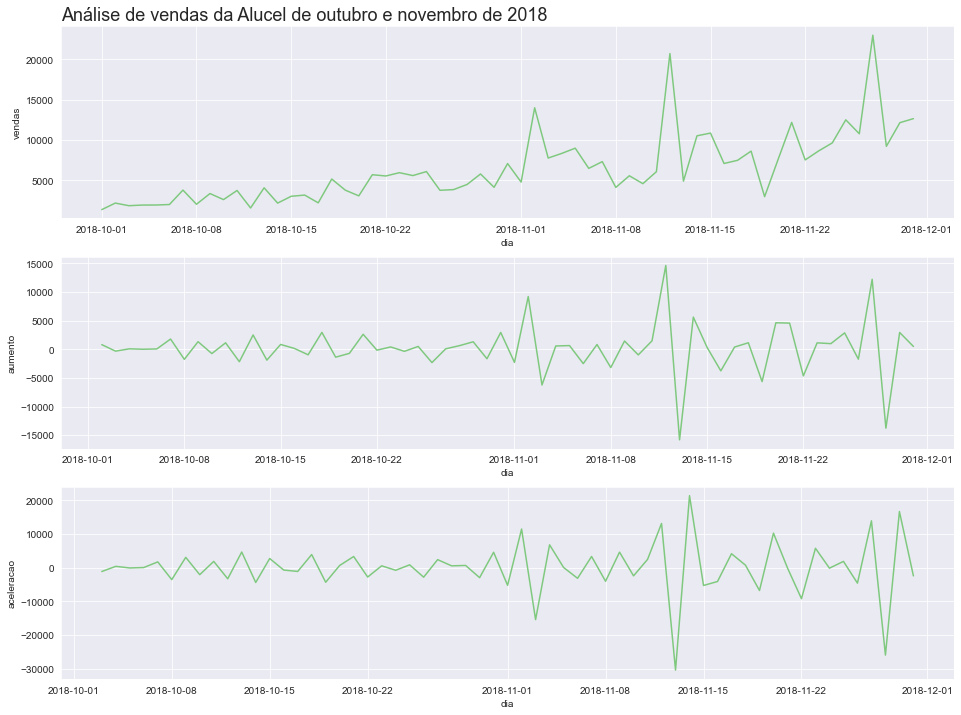

In [235]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', alucel, 'Análise de vendas da Alucel de outubro e novembro de 2018')

**Média móvel**

In [243]:
alucel['media_movel'] = alucel.vendas.rolling(7).mean()


In [245]:
alucel.head(7)

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429


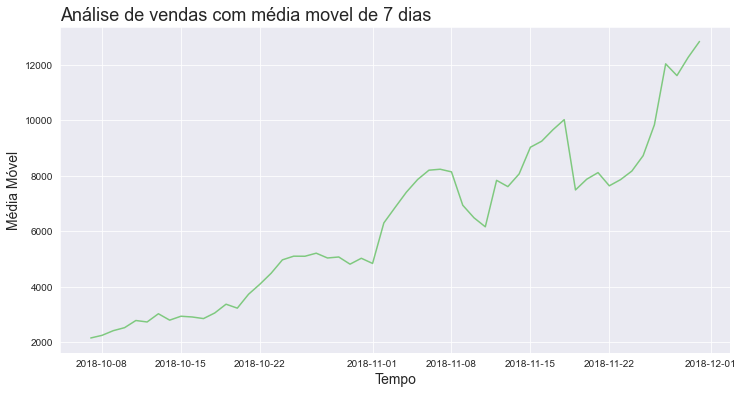

In [246]:
plotar('Análise de vendas com média movel de 7 dias', 'Tempo', 'Média Móvel', 'dia', 'media_movel', alucel)

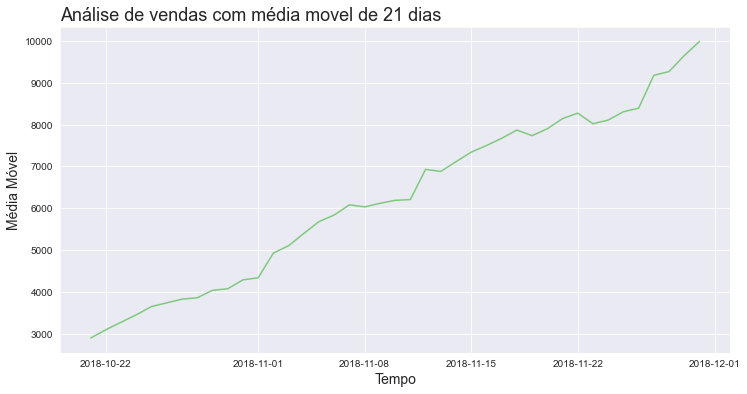

In [248]:
alucel['media_movel_21'] = alucel.vendas.rolling(21).mean()
plotar('Análise de vendas com média movel de 21 dias', 'Tempo', 'Média Móvel', 'dia', 'media_movel_21', alucel)

In [ ]:
plot_comparacao('dia', 'vendas', 'media_movel', 'media_movel_21', alucel, 'Comparação ')